## Exercise W4

#### Q1
Create a random noise color and grayscale image. 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


In [2]:
def generate_random_color_image(width, height):
    # Generate random noise for red, green, and blue channels
    r_channel = np.random.rand(width, height)
    g_channel = np.random.rand(width, height)
    b_channel = np.random.rand(width, height)

    # Stack the channels to create the color image
    color_img = np.dstack((r_channel, g_channel, b_channel))

    return color_img


# Custom width and height for the images
width = 200
height = 200

# Generate random color images
color_image = generate_random_color_image(width, height)






In [3]:
def generate_random_grayscale_image(width, height):
    # Generate random noise for the grayscale image
    grayscale_img = np.random.rand(width, height)

    return grayscale_img

# Custom width and height for the images
width = 200
height = 200

# Generate grayscale images

grayscale_img = generate_random_grayscale_image(width, height)


(-0.5, 199.5, 199.5, -0.5)

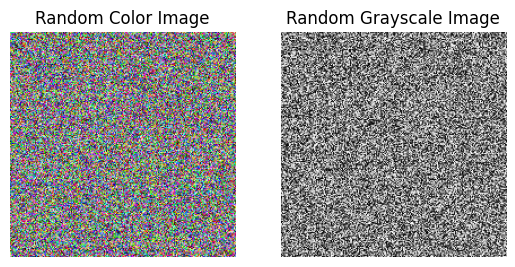

In [5]:
# Display the images using matplotlib


plt.subplot(1, 2, 1)
plt.imshow(color_image)
plt.title("Random Color Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grayscale_img, cmap='gray')
plt.title("Random Grayscale Image")
plt.axis('off')

#### Q2
Convert the code chunk found under section Divide an image into smaller patches using cropping into afunction with the following signature

In [20]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    img_copy = img.copy()
    height, width = img.shape[:2]
    M, N = int(height / num_vertical_grid), int(width / num_horizontal_grid)
    x1, y1 = 0, 0
    
    for y in range(0, height, M):
        for x in range(0, width, N):
            
            y1 = y + M
            x1 = x + N
            
            if x1>=width and y1>=height:
                
                x1 = width-1
                y1 = height-1
                cv.rectangle(img_copy, (x,y), (x1, y1), line_color, 1)
            
            elif y1>=height:
                
                y1 = height-1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
            
            elif x1>=width:
                
                x1 = width-1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
            
            else:
                
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
    
    return img_copy
                

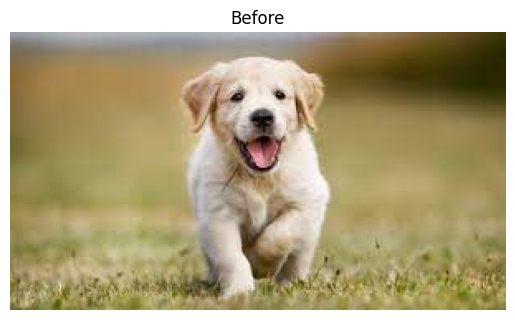

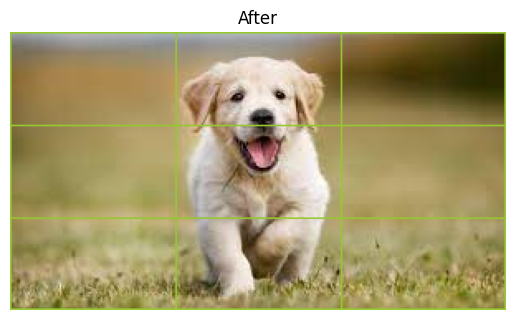

In [25]:
def pltshowconv(title, img):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

img = cv.imread('images/dog.jfif')
pltshowconv('Before', img)
img_grid = crop_grid(img, 3, 3, (50, 200, 150))
pltshowconv('After', img_grid)

#### Q3
Display image sequences of smooth transition of two images with different values of . Refer to code insection "Image blending". Use "lena.jfif" and "coins.jfif" as the base images.

In [28]:
def blend_images(img1, img2, alpha):
    return cv.addWeighted(img1, 1 - alpha, img2, alpha, 0)

def pltshowsub(img, col, title):
    global axes
    axes[col].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    axes[col].set_title(title)
    axes[col].axis('off')

def showsubplots():
    plt.tight_layout()
    plt.show()

# Load the two base images
img1 = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

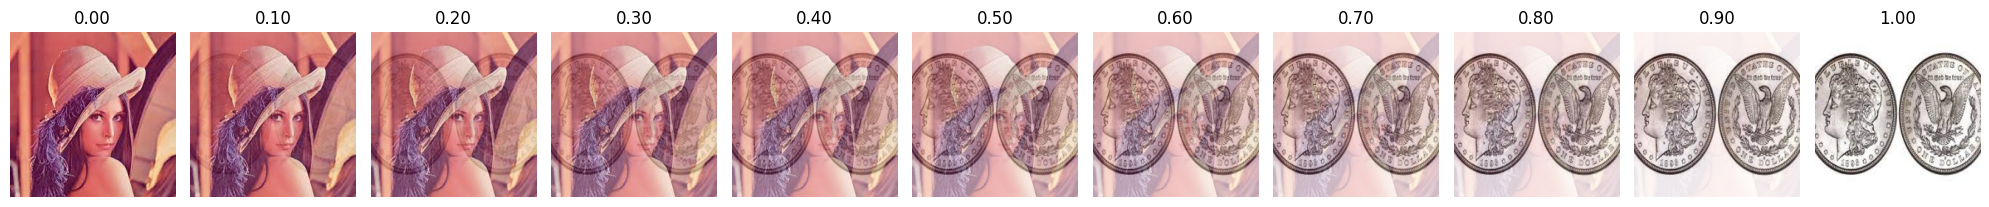

In [33]:
# Resize img2 to match img1's size
new_shape = img1.shape[:2]
img2 = cv.resize(img2, new_shape[::-1])

# Create a 1x11 subplot grid and set the figure size (1row,11column)
fig, axes = plt.subplots(1, 11, figsize=(20, 10))

# Display blended images with different alpha values
alphas = np.linspace(0, 1, 11)

# blend img1 and img2
for i, alpha in enumerate(alphas):
    blended = blend_images(img1, img2, alpha)
    pltshowsub(blended, i, f"{alpha:.2f}")

showsubplots()

#### Q4
Suppose you are a digital content creator and wish to share photo online. However, you wish to protectthese images from being stolen or altered by others. Leverage your image processing knowledge to applywatermark on image "travel_hd.jpg".

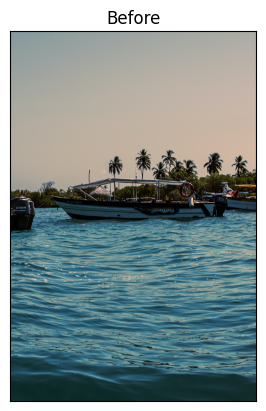

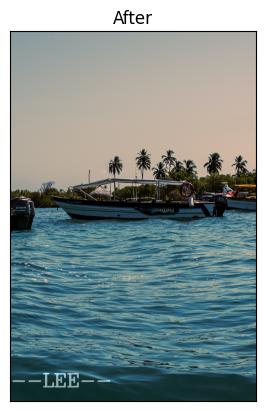

In [39]:
def pltshowconv(title, img):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()

img = cv.imread("images/travel_hd.jpg")
pltshowconv("Before", img)

# Define the watermark text
text = '--LEE--'
font = cv.FONT_HERSHEY_COMPLEX
scale = 10
thickness = 25

# Get the size of the text
text_size, _ = cv.getTextSize(text, font, scale, thickness)

# Set the position for the watermark (bottom-left corner with an offset)
x = 10
y = img.shape[0] - text_size[1] - 10

# Create a blank watermark image with the same size as the original image
watermark = np.zeros_like(img)

# Draw the text on the watermark image
cv.putText(watermark, text, (x, y), font, scale, (255, 255, 255), thickness)

# Blend the watermark with the original image using alpha blending
alpha = 0.5
img_watermarked = cv.addWeighted(img, 1, watermark, alpha, 0)

# Display the watermarked image
pltshowconv('After', img_watermarked)